In [17]:
import pandas as pd
df = pd.read_csv('texts.csv', sep='\t', encoding='utf-8')
df.head()

,Subcorpus,Filename,Year data collection,Placement test score (raw),Placement test score (%),Proficiency,Sex,Age,School/University/Institution,Major,...,Proficiency (self-assessment) in additional language writing,Medium,Task number,Task title,Writing/audio details,Minutes taken to complete the task,Where the task was done,Resources used,Text,Original text
0,Learners,DE_SP_B1_33_10_14_JR,2018,38 / 60,63.3,B1 (lower intermediate),Female,33,Universität Bremen,"English-Speaking Cultures, Philosophie",...,B1 (lower intermediate),Spoken,14,14. Chaplin,spoken_offline_lab,NaN,NaN,NaN,Ok this story is about toch uh Charles Chaplin...,NaN
1,Learners,DE_SP_B2_20_12_14_EB,2018,43 / 60,71.7,B2 (upper intermediate),Female,20,Universität Bremen,English Speaking Cultures,...,B1 (lower intermediate),Spoken,14,14. Chaplin,spoken_offline_lab,NaN,NaN,NaN,uh in the clip Charlie Chaplin walks down a di...,NaN
2,Learners,DE_SP_B2_18_16_14_LN,2019,44 / 60,73.3,B2 (upper intermediate),Female,18,Universität Bremen,English-Speaking Cultures,...,A1 (lower beginner),Spoken,14,14. Chaplin,spoken_offline_lab,NaN,NaN,NaN,okay so the uh man in the clip uh was on a wal...,NaN
3,Learners,DE_SP_B2_22_15_14_LSO,2019,44 / 60,73.3,B2 (upper intermediate),Female,22,Universität Bremen,Zweifach Bachelor mit Lehramtsoption GyO,...,A2 (upper beginner),Spoken,14,14. Chaplin,spoken_offline_lab,45.0,Outside classroom,"Bilingual dictionary (German/English), Spellch...",it is a black ‘n’ white movie from Charlie Cha...,NaN
4,Learners,DE_SP_B2_23_14_14_GZ,2018,45 / 60,75.0,B2 (upper intermediate),Female,23,Universität Bremen,"LA, BA",...,NaN,Spoken,14,14. Chaplin,spoken_offline_lab,NaN,NaN,NaN,okay so uh he walks down the street as someone...,NaN


In [18]:
import pandas as pd
score_counts = df['Placement test score (raw)'].value_counts()
print("Number of different scores:", len(score_counts))
print(score_counts)

Number of different scores: 42
Placement test score (raw)
51 / 60    13
49 / 60    12
57 / 60    12
54 / 60    10
52 / 60     9
56 / 60     8
46 / 60     8
39 / 60     7
43 / 60     7
47 / 60     7
50 / 60     7
55 / 60     6
40 / 60     6
38 / 60     6
48 / 60     6
44 / 60     6
53 / 60     5
45 / 60     5
34 / 60     5
58 / 60     4
59 / 60     4
60 / 60     4
37 / 60     4
36 / 60     4
27 / 60     3
41 / 60     3
33 / 60     3
30 / 60     3
42 / 60     3
23 / 60     3
31 / 60     2
32 / 60     2
25 / 60     2
29 / 60     1
26 / 60     1
24 / 60     1
35 / 60     1
22 / 60     1
20 / 60     1
14 / 60     1
12 / 60     1
16 / 60     1
Name: count, dtype: int64


In [19]:
unique_scores_count = df['Placement test score (raw)'].nunique()
print("Number of unique scores:", unique_scores_count)


Number of unique scores: 42


In [20]:
import spacy
nlp_en = spacy.load("/Users/mihayiermihayier/Documents/MATLAB/myenv/lib/python3.11/site-packages/en_core_web_sm/en_core_web_sm-3.7.1")

#Let's count all incorrect instances of 3-person verb conjugations and correct instances of 3-person conjugations by English proficiency level and calculate Chi-squared with Proficiency level as a factor

In [21]:
import pandas as pd
from scipy.stats import chi2_contingency

# Function to check if a verb is correctly conjugated for third-person singular
def is_verb_correct_for_third_person_singular(verb):
    return verb.endswith('s') or verb in {"doesn't", "don't"}

# Function to analyze verb usage with third-person singular subjects in a given text
def analyze_third_person_singular_verbs(text, nlp):
    doc = nlp(text)
    verb_subject_pairs = []  # To store verbs along with their subjects

    for token in doc:
        if token.pos_ == "VERB" and token.tag_ in ["VBZ", "VBP"]:
            is_negated = False
            for child in token.children:
                if child.lower_ == "not":
                    is_negated = True
            for child in token.children:
                # Check if the subject is a third-person singular noun or pronoun
                if child.dep_ == "nsubj" and (child.tag_ in ["NN", "NNP"] or child.text.lower() in {"he", "she", "it"}):
                    verb = f"does not {token.text}" if is_negated else token.text
                    verb_subject_pairs.append((child.text, verb))
                    break

    return verb_subject_pairs


# Grouping the filtered dataset by proficiency and analyzing each group
proficiency_results = {}

for proficiency, group in df.groupby('Proficiency'):
    incorrect_conjugations = []  # To store incorrect conjugations
    correct_conjugations = []  # To store correct conjugations
    correct_count = 0  # To count correct conjugations
    incorrect_count = 0  # To count incorrect conjugations
    for text in group['Text']:
        verb_subject_pairs = analyze_third_person_singular_verbs(text, nlp_en)
        for subject, verb in verb_subject_pairs:
            if is_verb_correct_for_third_person_singular(verb):
                correct_count += 1
                correct_conjugations.append((subject, verb))  # Add the correct conjugation
            else:
                incorrect_count += 1
                incorrect_conjugations.append((subject, verb))  # Add the incorrect conjugation
    total_count = correct_count + incorrect_count
    proficiency_results[proficiency] = {
        "correct_count": correct_count,
        "incorrect_count": incorrect_count,
        "correct_conjugations": correct_conjugations,  # Store correct conjugations
        "proportion": incorrect_count / total_count if total_count > 0 else 0,
        "incorrect_conjugations": incorrect_conjugations,
    }

# Convert lists of tuples into a string format for CSV compatibility
for proficiency in proficiency_results:
    proficiency_results[proficiency]['correct_conjugations'] = '; '.join(
        [f"{subject} {verb}" for subject, verb in proficiency_results[proficiency]['correct_conjugations']]
    )
    proficiency_results[proficiency]['incorrect_conjugations'] = '; '.join(
        [f"{subject} {verb}" for subject, verb in proficiency_results[proficiency]['incorrect_conjugations']]
    )

results_df = pd.DataFrame.from_dict(proficiency_results, orient='index')

# Perform the chi-squared test with proficiency level as a factor
contingency_table = results_df[['correct_count', 'incorrect_count']]
chi2, p, _, _ = chi2_contingency(contingency_table)
results_df['chi2_statistic'] = chi2
results_df['p_value'] = p
results_df.to_csv('verb_conjugation_results.csv')

print("Proficiency Results with Chi-squared Test and Expanded Subject Analysis:")
print(results_df)

Proficiency Results with Chi-squared Test and Expanded Subject Analysis:
                         correct_count  incorrect_count   
A1 (lower beginner)                 18                9  \
A2 (upper beginner)                 38               70   
B1 (lower intermediate)            364              170   
B2 (upper intermediate)            810               92   
C1 (lower advanced)               1274               29   
C2 (upper advanced)                947               17   

                                                      correct_conjugations   
A1 (lower beginner)      he tries; he tries; he tries; he tries; Chapli...  \
A2 (upper beginner)      policeman appears; woman thinks; it happens; s...   
B1 (lower intermediate)  it starts; he walks; baby lies; he picks; he l...   
B2 (upper intermediate)  Chaplin walks; he ’s; he finds; baby picks; ba...   
C1 (lower advanced)      it ’s; he finds; he picks; he tries; he tries;...   
C2 (upper advanced)      he loses; he lights;

#Now let's visualize the results with a barplot

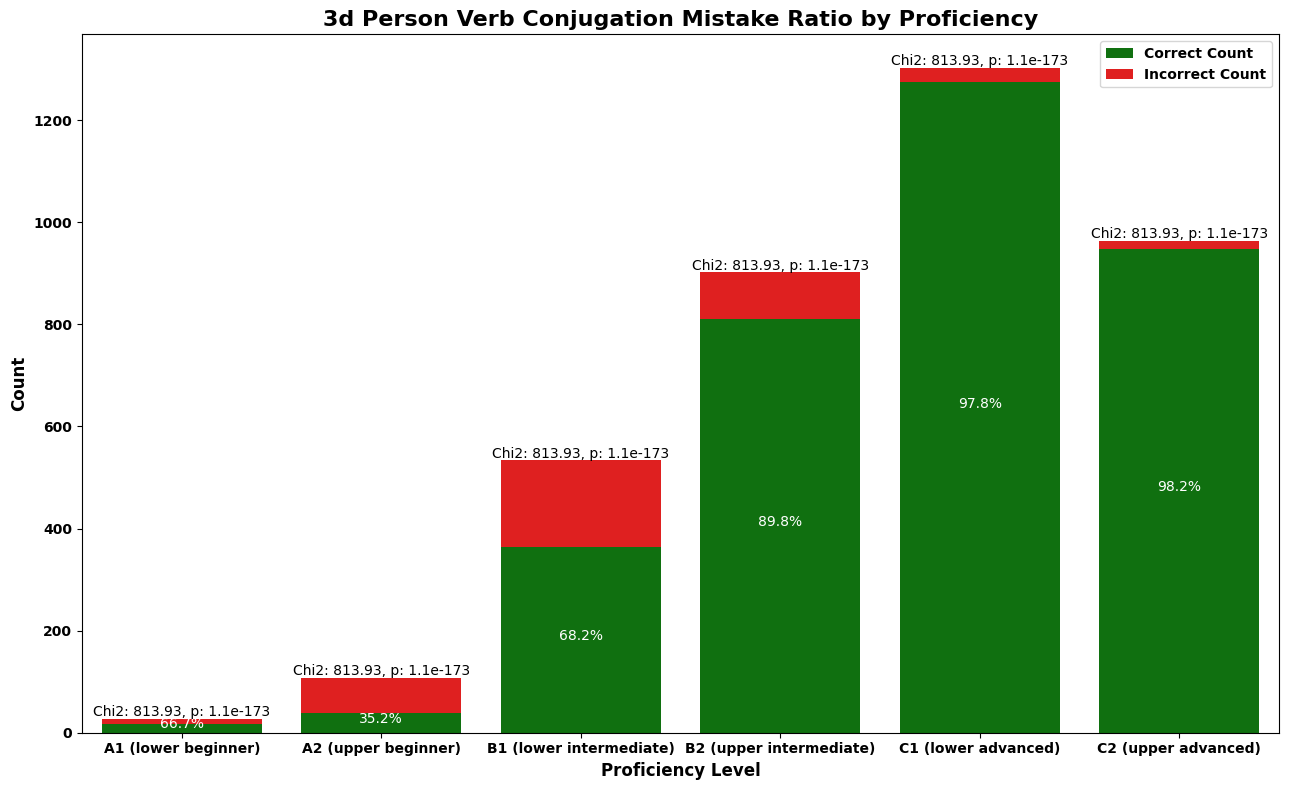

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(13, 8))
sns.barplot(x=results_df.index, y='correct_count', data=results_df, color='green', label='Correct Count')
sns.barplot(x=results_df.index, y='incorrect_count', data=results_df, color='red', label='Incorrect Count', bottom=results_df['correct_count'])

plt.title('3d Person Verb Conjugation Mistake Ratio by Proficiency', fontsize=16, fontweight='bold')
plt.xlabel('Proficiency Level', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.legend(prop={'weight': 'bold'})


# Displaying the chi-squared statistic and the p-value (with formatting for small numbers)
for index, row in results_df.iterrows():
    total_count = row['correct_count'] + row['incorrect_count']
    correct_proportion = (row['correct_count'] / total_count) * 100 if total_count > 0 else 0

    # Formatting the p-value to handle very small numbers
    p_value_display = f"{row['p_value']:.1e}" if row['p_value'] < 0.01 else f"{row['p_value']:.2f}"
    chi2_text = f"Chi2: {row['chi2_statistic']:.2f}, p: {p_value_display}"
    
    # Positioning the text for correct proportion
    if row['correct_count'] > 0:
        plt.text(x=index, y=row['correct_count'] / 2, s=f"{correct_proportion:.1f}%", ha='center', color='white')

    # Displaying the chi-squared statistic and p-value
    plt.text(x=index, y=total_count + 5, s=chi2_text, ha='center')

plt.tight_layout()
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

#Chi-squared results show that English proficiency catigorical variable influences 3-person verb conjugation among L2 speakers

In [23]:

sex_counts_by_proficiency = df.groupby(['Proficiency', 'Sex']).size().unstack(fill_value=0)
print("Counts of Males and Females in Each Proficiency Level:")
print(sex_counts_by_proficiency)


Counts of Males and Females in Each Proficiency Level:
Sex                      Female  Male  Unknown
Proficiency                                   
A1 (lower beginner)           3     0        0
A2 (upper beginner)           8     5        0
B1 (lower intermediate)      30     7        0
B2 (upper intermediate)      39     6        0
C1 (lower advanced)          39    23        0
C2 (upper advanced)          26    10        2


#Before counting correct and incorrect instances of 3-person verb conjugations, let's filter unknown results and A1 proficiency level. Consequently we need to run a Chi-squared test for each proficiency level with sex as a factor

In [24]:

# Analyze dataset and gather counts
proficiency_sex_results = {}
for (proficiency, sex), group in df.groupby(['Proficiency', 'Sex']):
    # Exclude 'Unknown' and 'A1' proficiency levels
    if proficiency in ['Unknown', 'A1']:
        continue

    incorrect_conjugations = []  # To store incorrect conjugations
    correct_conjugations = []  # To store correct conjugations
    correct_count = 0  # To count correct conjugations
    incorrect_count = 0  # To count incorrect conjugations
    for text in group['Text']:
        verb_subject_pairs = analyze_third_person_singular_verbs(text, nlp_en)
        for subject, verb in verb_subject_pairs:
            if is_verb_correct_for_third_person_singular(verb):
                correct_count += 1
                correct_conjugations.append((subject, verb))  # Add the correct conjugation
            else:
                incorrect_count += 1
                incorrect_conjugations.append((subject, verb))  # Add the incorrect conjugation
    total_count = correct_count + incorrect_count
    proficiency_sex_results[(proficiency, sex)] = {
        "correct_count": correct_count,
        "incorrect_count": incorrect_count,
        "correct_conjugations": correct_conjugations,
        "incorrect_conjugations": incorrect_conjugations,
        "proportion": incorrect_count / total_count if total_count > 0 else 0,
    }

# Convert lists of tuples into a string format for CSV compatibility
for key in proficiency_sex_results:
    proficiency_sex_results[key]['correct_conjugations'] = '; '.join(
        [f"{subject} {verb}" for subject, verb in proficiency_sex_results[key]['correct_conjugations']]
    )
    proficiency_sex_results[key]['incorrect_conjugations'] = '; '.join(
        [f"{subject} {verb}" for subject, verb in proficiency_sex_results[key]['incorrect_conjugations']]
    )

# Create a DataFrame from the results
results_df = pd.DataFrame.from_dict(proficiency_sex_results, orient='index')

# Perform the chi-squared test with sex as a factor in different proficiency levels
contingency_table = results_df[['correct_count', 'incorrect_count']]
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the results
print("Proficiency and Sex Results with Detailed Conjugation Analysis:")
print(results_df)
results_df.to_csv('verb_conjugation_results_by_sex.csv')

chi_squared_results = {}
proficiency_levels = set(df['Proficiency']) - {'Unknown', 'A1'}

for proficiency in proficiency_levels:
    male_correct = proficiency_sex_results.get((proficiency, 'Male'), {}).get('correct_count', 0)
    male_incorrect = proficiency_sex_results.get((proficiency, 'Male'), {}).get('incorrect_count', 0)
    female_correct = proficiency_sex_results.get((proficiency, 'Female'), {}).get('correct_count', 0)
    female_incorrect = proficiency_sex_results.get((proficiency, 'Female'), {}).get('incorrect_count', 0)

    # Check if there are data for both male and female
    if male_correct + male_incorrect > 0 and female_correct + female_incorrect > 0:
        contingency_table = [[male_correct, male_incorrect], [female_correct, female_incorrect]]
        chi2, p, _, _ = chi2_contingency(contingency_table)

        chi_squared_results[proficiency] = {
            'chi2_statistic': chi2,
            'p_value': p
        }

chi_squared_df = pd.DataFrame.from_dict(chi_squared_results, orient='index')

# Output the results
print("Chi-Squared Test Results by Proficiency Level:")
print(chi_squared_df)
chi_squared_df.to_csv('chi_squared_results_by_proficiency_and_sex.csv')

# Reset index of results_df to make 'Proficiency' and 'Sex' regular columns
results_df_reset = results_df.reset_index()
results_df_reset.columns = ['Proficiency', 'Sex', 'Correct_Count', 'Incorrect_Count', 'Correct_Conjugations', 'Incorrect_Conjugations', 'Proportion']
chi_squared_df = chi_squared_df.rename_axis('Proficiency').reset_index()

# Merge the detailed results with the chi-squared test results
combined_results_df = pd.merge(results_df_reset, chi_squared_df, on='Proficiency', how='outer')

print("Combined Proficiency, Sex Results, and Chi-Squared Test Results:")
print(combined_results_df)
combined_results_df.to_csv('verb_conjugation_chi_squared_results_by_sex.csv')

Proficiency and Sex Results with Detailed Conjugation Analysis:
                                 correct_count  incorrect_count   
A1 (lower beginner)     Female              18                9  \
A2 (upper beginner)     Female              33               46   
                        Male                 5               24   
B1 (lower intermediate) Female             263              156   
                        Male               101               14   
B2 (upper intermediate) Female             732               71   
                        Male                78               21   
C1 (lower advanced)     Female             752               22   
                        Male               522                7   
C2 (upper advanced)     Female             700               14   
                        Male               202                2   
                        Unknown             45                1   

                                                              co

In [25]:
combined_results_df







,Proficiency,Sex,Correct_Count,Incorrect_Count,Correct_Conjugations,Incorrect_Conjugations,Proportion,chi2_statistic,p_value
0,A1 (lower beginner),Female,18,9,he tries; he tries; he tries; he tries; Chapli...,police come; he pick; he find; Charles give; h...,0.333333,NaN,NaN
1,A2 (upper beginner),Female,33,46,she is; he thinks; he runs; she returns; she r...,he find; he think; baby say; she respond; she ...,0.582278,4.573455,3.247101e-02
2,A2 (upper beginner),Male,5,24,policeman appears; woman thinks; it happens; m...,he find; he decide; woman refuse; he give; man...,0.827586,4.573455,3.247101e-02
3,B1 (lower intermediate),Female,263,156,it starts; he walks; baby lies; he picks; he l...,Chaplin get; he decide; he stop; he leave; Cha...,0.372315,24.966532,5.833418e-07
4,B1 (lower intermediate),Male,101,14,he sees; woman gets; Chaplin decides; he picks...,woman appear; policeman appear; Chaplin realis...,0.121739,24.966532,5.833418e-07
5,B2 (upper intermediate),Female,732,71,Chaplin walks; he ’s; he finds; baby picks; ba...,he ask; love love; he see; minute walk; man th...,0.088418,13.404987,2.509563e-04
6,B2 (upper intermediate),Male,78,21,it consists; he goes; he gives; he tries; he f...,something make; he see; he see; he try; baby c...,0.212121,13.404987,2.509563e-04
7,C1 (lower advanced),Female,752,22,it ’s; he finds; he picks; he tries; he tries;...,she see; she assume; he think; he hhh; police ...,0.028424,2.670895,1.021985e-01
8,C1 (lower advanced),Male,522,7,Chaplin rumbles; he walks; baby seems; he pick...,he get; he give; he take; man try; woman blame...,0.013233,2.670895,1.021985e-01
9,C2 (upper advanced),Female,700,14,he loses; he lights; he throws; he sees; he pi...,it belong; he do; she like; he like; he take; ...,0.019608,0.410049,5.219448e-01


In [26]:
filtered_df = combined_results_df[~combined_results_df['Proficiency'].isin(['A1 (lower beginner)'])]
filtered_df = filtered_df[filtered_df['Sex'] != 'Unknown']

#Again let's visualize the results with a barplot

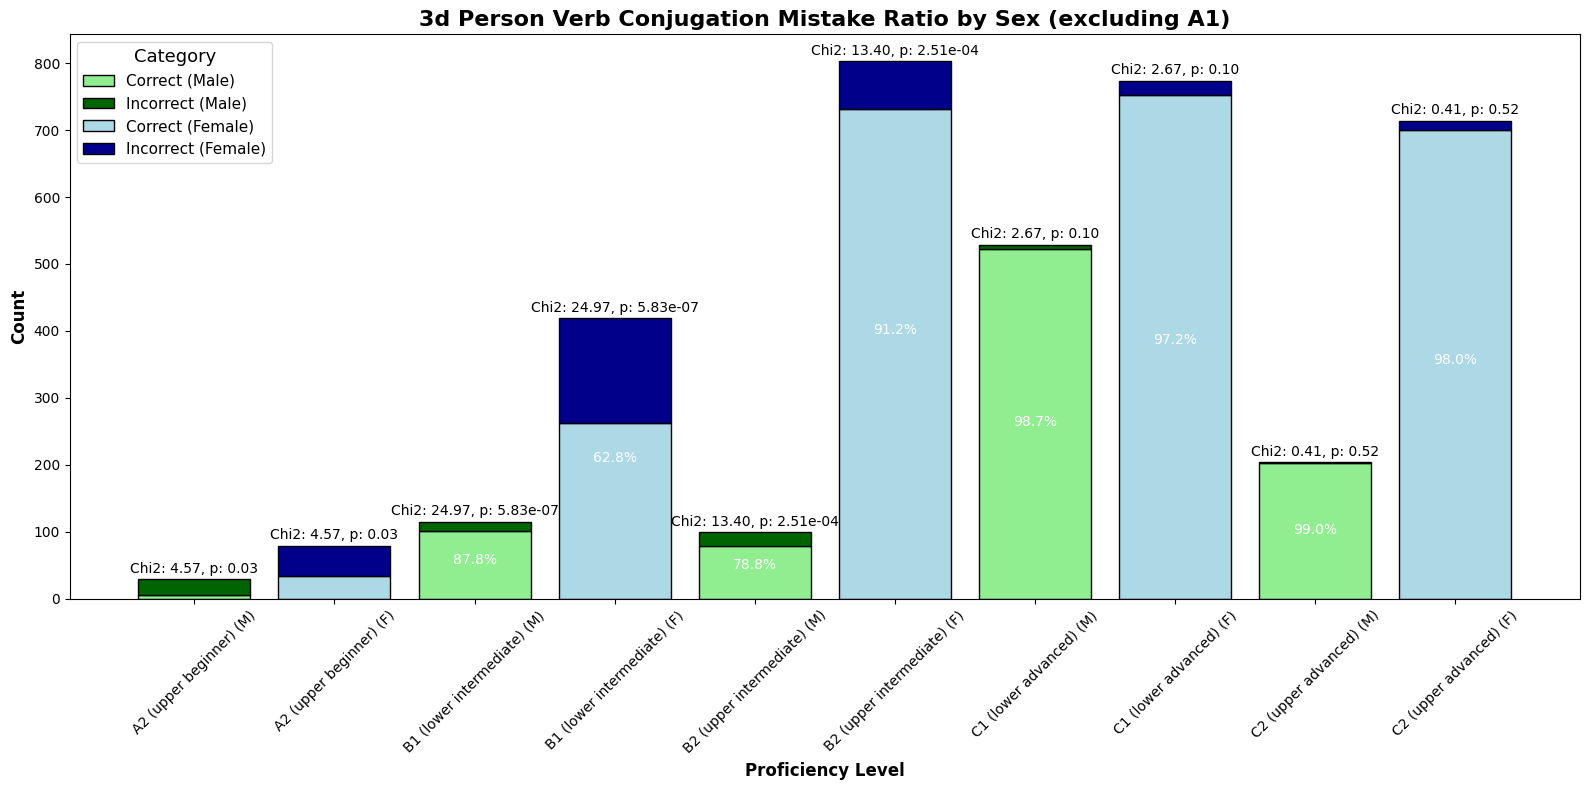

In [27]:
import matplotlib.pyplot as plt
proficiency_order = filtered_df['Proficiency'].unique()
plt.figure(figsize=(16, 8))
# Iterate over each proficiency level in the specified order
for proficiency in proficiency_order:
    # Subset for males and females
    male_subset = filtered_df[(filtered_df['Proficiency'] == proficiency) & (filtered_df['Sex'] == 'Male')]
    female_subset = filtered_df[(filtered_df['Proficiency'] == proficiency) & (filtered_df['Sex'] == 'Female')]

    # Plotting the bars and adding text for proportions and chi-squared results
    for subset, sex_label, color_light, color_dark in [(male_subset, ' (M)', 'lightgreen', 'darkgreen'), (female_subset, ' (F)', 'lightblue', 'darkblue')]:
        if not subset.empty:
            correct = subset['Correct_Count'].values[0]
            incorrect = subset['Incorrect_Count'].values[0]
            total_count = correct + incorrect
            
            # Proportion text (not displayed for A2 level)
            if proficiency != 'A2 (upper beginner)':
                proportion = correct / total_count if total_count > 0 else 0
                proportion_text = f"{proportion * 100:.1f}%"
                text_y_position = total_count/2
                plt.text(proficiency + sex_label, text_y_position, proportion_text, ha='center', va='center', color='white')
            
            plt.bar(proficiency + sex_label, correct, color=color_light, edgecolor='black')
            plt.bar(proficiency + sex_label, incorrect, bottom=correct, color=color_dark, edgecolor='black')

            # Chi-squared results
            if 'chi2_statistic' in subset.columns and 'p_value' in subset.columns:
                chi2_stat = subset['chi2_statistic'].values[0]
                p_val = subset['p_value'].values[0]
                p_val_text = f"p: {p_val:.2e}" if p_val < 0.01 else f"p: {p_val:.2f}"
                chi2_text = f"Chi2: {chi2_stat:.2f}, {p_val_text}"
                plt.text(proficiency + sex_label, total_count + 5, chi2_text, ha='center', va='bottom')

plt.title('3d Person Verb Conjugation Mistake Ratio by Sex (excluding A1)', fontsize=16, fontweight='bold')
plt.xlabel('Proficiency Level', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(['Correct (Male)', 'Incorrect (Male)', 'Correct (Female)', 'Incorrect (Female)'], loc='upper left', title='Category', title_fontsize='13', fontsize='11')

plt.tight_layout()
plt.show()

#From the barplot we can see that in A2 proficiency level women performed better than men, in B1 and B2 level men performed better than women. Starting from C1 proficiency level sex factor didn't significantly influence the proportion of correct and incorrect counts.

#Now let's perform a similar analysis, but this time let's look into L1 factor's influence on incorrect rate of 3-d person verb conjugations in each proficiency level

In [28]:


# Analyze dataset and gather counts
proficiency_L1_results = {}
for (proficiency, l1), group in df.groupby(['Proficiency', 'L1']):
    incorrect_conjugations = []  # To store incorrect conjugations
    correct_conjugations = []  # To store correct conjugations
    correct_count = 0  # To count correct conjugations
    incorrect_count = 0  # To count incorrect conjugations
    for text in group['Text']:
        verb_subject_pairs = analyze_third_person_singular_verbs(text, nlp_en)
        for subject, verb in verb_subject_pairs:
            if is_verb_correct_for_third_person_singular(verb):
                correct_count += 1
                correct_conjugations.append((subject, verb))  # Add the correct conjugation
            else:
                incorrect_count += 1
                incorrect_conjugations.append((subject, verb))  # Add the incorrect conjugation
    total_count = correct_count + incorrect_count
    proficiency_L1_results[(proficiency, l1)] = {
        "correct_count": correct_count,
        "incorrect_count": incorrect_count,
        "correct_conjugations": correct_conjugations,
        "incorrect_conjugations": incorrect_conjugations,
        "proportion": incorrect_count / total_count if total_count > 0 else 0,
    }

# Convert lists of tuples into a string format for CSV compatibility
for key in proficiency_L1_results:
    proficiency_L1_results[key]['correct_conjugations'] = '; '.join(
        [f"{subject} {verb}" for subject, verb in proficiency_L1_results[key]['correct_conjugations']]
    )
    proficiency_L1_results[key]['incorrect_conjugations'] = '; '.join(
        [f"{subject} {verb}" for subject, verb in proficiency_L1_results[key]['incorrect_conjugations']]
    )
results_df = pd.DataFrame.from_dict(proficiency_L1_results, orient='index')

# Perform the chi-squared test with proficiency and sex as factors
contingency_table = results_df[['correct_count', 'incorrect_count']]
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Proficiency and L1 Results with Detailed Conjugation Analysis:")
print(results_df)
results_df.to_csv('verb_conjugation_results_by_l1.csv')

# Prepare data for chi-squared tests
chi_squared_results = {}
proficiency_levels = set(df['Proficiency']) - {'Unknown', 'A1'}

for proficiency in proficiency_levels:
    male_correct = proficiency_L1_results.get((proficiency, 'German'), {}).get('correct_count', 0)
    male_incorrect = proficiency_L1_results.get((proficiency, 'German'), {}).get('incorrect_count', 0)
    female_correct = proficiency_L1_results.get((proficiency, 'Spanish'), {}).get('correct_count', 0)
    female_incorrect = proficiency_L1_results.get((proficiency, 'Spanish'), {}).get('incorrect_count', 0)

    # Check if there are data for both male and female
    if male_correct + male_incorrect > 0 and female_correct + female_incorrect > 0:
        contingency_table = [[male_correct, male_incorrect], [female_correct, female_incorrect]]
        chi2, p, _, _ = chi2_contingency(contingency_table)

        chi_squared_results[proficiency] = {
            'chi2_statistic': chi2,
            'p_value': p
        }

# Convert chi-squared results to DataFrame
chi_squared_df = pd.DataFrame.from_dict(chi_squared_results, orient='index')
print("Chi-Squared Test Results by Proficiency Level:")
print(chi_squared_df)
chi_squared_df.to_csv('chi_squared_results_by_proficiency_and_l1.csv')

# Reset index of results_df to make 'Proficiency' and 'Sex' regular columns
results_df_reset = results_df.reset_index()
results_df_reset.columns = ['Proficiency', 'L1', 'Correct_Count', 'Incorrect_Count', 'Correct_Conjugations', 'Incorrect_Conjugations', 'Proportion']
chi_squared_df = chi_squared_df.rename_axis('Proficiency').reset_index()

# Merge the detailed results with the chi-squared test results
combined_results_df = pd.merge(results_df_reset, chi_squared_df, on='Proficiency', how='outer')
print("Combined Proficiency, L1 Results, and Chi-Squared Test Results:")
print(combined_results_df)
combined_results_df.to_csv('verb_conjugation_chi_squared_results_by_l1.csv')



Proficiency and L1 Results with Detailed Conjugation Analysis:
                                 correct_count  incorrect_count   
A1 (lower beginner)     Spanish             18                9  \
A2 (upper beginner)     Spanish             38               70   
B1 (lower intermediate) German              24                2   
                        Spanish            340              168   
B2 (upper intermediate) German             210                6   
                        Spanish            600               86   
C1 (lower advanced)     German             829               12   
                        Spanish            445               17   
C2 (upper advanced)     German             836                9   
                        Spanish            111                8   

                                                              correct_conjugations   
A1 (lower beginner)     Spanish  he tries; he tries; he tries; he tries; Chapli...  \
A2 (upper beginner)     Spa

#We need to exclude A1 and A2 results before plotting the barplots, since we need to compare both German and Spanish L1 results

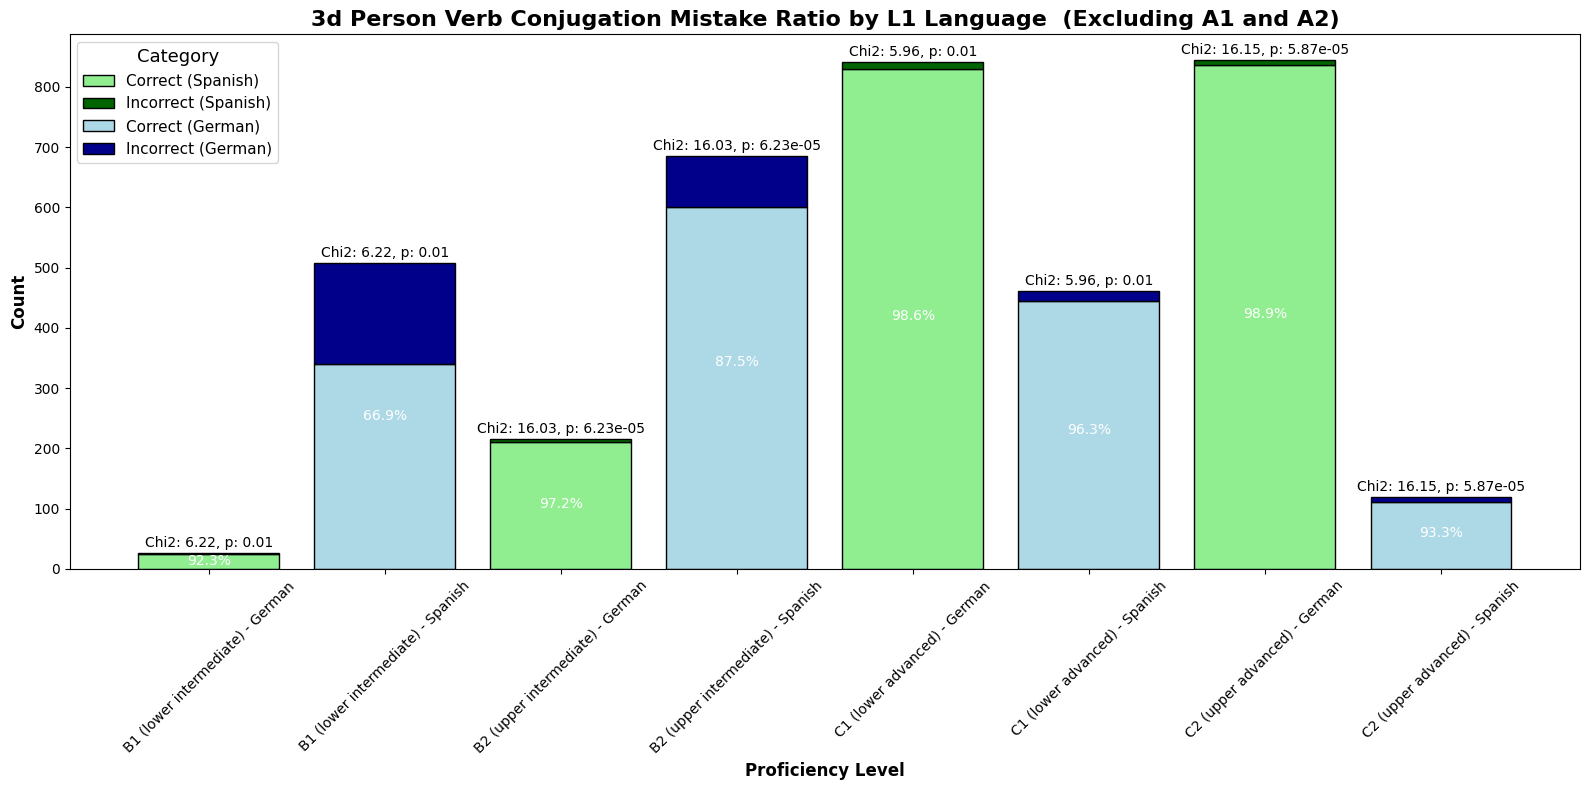

In [29]:

combined_results_df = pd.read_csv('verb_conjugation_chi_squared_results_by_l1.csv')

# Filter out A1 and A2 data
combined_results_df = combined_results_df[~combined_results_df['Proficiency'].isin(['A2 (upper beginner)'])]
combined_results_df = combined_results_df[~combined_results_df['Proficiency'].isin(['A1 (lower beginner)'])]

# Sort the DataFrame based on 'Proficiency' and 'L1'
combined_results_df.sort_values(by=['Proficiency', 'L1'], inplace=True)
plt.figure(figsize=(16, 8))
colors = {'Spanish': ('lightblue', 'darkblue'), 'German': ('lightgreen', 'darkgreen')}

# Iterate over each combination of proficiency level and L1 language
for i, (proficiency, l1) in enumerate(combined_results_df[['Proficiency', 'L1']].values):
    subset = combined_results_df[(combined_results_df['Proficiency'] == proficiency) & (combined_results_df['L1'] == l1)]
    
    if not subset.empty:
        correct = subset['Correct_Count'].values[0]
        incorrect = subset['Incorrect_Count'].values[0]
        total_count = correct + incorrect

        # Proportion text
        proportion = correct / total_count if total_count > 0 else 0
        proportion_text = f"{proportion * 100:.1f}%"
        
        # Bar plot with different colors for Spanish and German
        color_light, color_dark = colors.get(l1, ('grey', 'black'))
        plt.bar(i, correct, color=color_light, edgecolor='black')
        plt.bar(i, incorrect, bottom=correct, color=color_dark, edgecolor='black')
        plt.text(i, total_count/2, proportion_text, ha='center', va='center', color='white')

        # Chi-squared results
        if 'chi2_statistic' in subset.columns and 'p_value' in subset.columns:
            chi2_stat = subset['chi2_statistic'].values[0]
            p_val = subset['p_value'].values[0]
            p_val_text = f"p: {p_val:.2e}" if p_val < 0.01 else f"p: {p_val:.2f}"
            chi2_text = f"Chi2: {chi2_stat:.2f}, {p_val_text}"
            plt.text(i, total_count + 5, chi2_text, ha='center', va='bottom')

plt.title('3d Person Verb Conjugation Mistake Ratio by L1 Language  (Excluding A1 and A2)', fontsize=16, fontweight='bold')
plt.xlabel('Proficiency Level', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(range(len(combined_results_df)), [f'{p} - {l}' for p, l in combined_results_df[['Proficiency', 'L1']].values], rotation=45)

plt.legend(['Correct (Spanish)', 'Incorrect (Spanish)', 'Correct (German)', 'Incorrect (German)'], loc='upper left', title='Category', title_fontsize='13', fontsize='11')

plt.tight_layout()
plt.show()


#From the barplot we can see that across all proficiency levels starting from B1 German speakers performed better than Spanish speakers. 

#Let's preprocess the data to facilitate a Simple Linear Regression analysis, using the 'Correct Total Ratio' and 'Score Percentage' as continuous variables. To do this, we need to add a new column to the dataset containing boolean values. This column will indicate whether each sentence is correctly conjugated or not, and we'll name it 'Is_Correct

In [30]:
detailed_results = []

# Analyze dataset and gather counts
for index, row in df.iterrows():
    text = row['Text']
    placement_score = row['Placement test score (raw)']  
    proficiency = row['Proficiency']
    sex = row['Sex']
    verb_subject_pairs = analyze_third_person_singular_verbs(text, nlp_en)
    for subject, verb in verb_subject_pairs:
        is_correct = is_verb_correct_for_third_person_singular(verb)
        detailed_results.append({
            "Subject": subject,
            "Verb": verb,
            "Is_Correct": is_correct,
            "Placement_Test_Score": placement_score,
            "Proficiency": proficiency,
            "Sex": sex
        })
detailed_results_df = pd.DataFrame(detailed_results)
detailed_results_df.to_csv('detailed_verb_analysis_with_scores.csv', index=False)

In [31]:
detailed_results_df

,Subject,Verb,Is_Correct,Placement_Test_Score,Proficiency,Sex
0,Chaplin,get,False,38 / 60,B1 (lower intermediate),Female
1,it,starts,True,38 / 60,B1 (lower intermediate),Female
2,he,walks,True,38 / 60,B1 (lower intermediate),Female
3,baby,lies,True,38 / 60,B1 (lower intermediate),Female
4,he,picks,True,38 / 60,B1 (lower intermediate),Female
...,...,...,...,...,...,...
3833,c=,comes,True,60 / 60,C2 (upper advanced),Female
3834,note,says,True,60 / 60,C2 (upper advanced),Female
3835,Chaplin,changes,True,60 / 60,C2 (upper advanced),Female
3836,he,looks,True,60 / 60,C2 (upper advanced),Female


#Now we need to add Score, Total Score columns to the dataframe. Also we need to calculate Placement Test Score Proportion and Correct Total Ratio for each Score and add these two columns to the dataframe. Since there are 42 unique scores, there should be 42 datapoints 

In [32]:

file_path = 'detailed_verb_analysis_with_scores.csv'  
data = pd.read_csv(file_path)
data['Is_Correct'] = data['Is_Correct'].astype(int)

# Convert 'Placement_Test_Score' to a proportion (0-1 scale)
# Split the score from the total, convert them to integers, and then divide to get the proportion
data[['Score', 'Total_Score']] = data['Placement_Test_Score'].str.split(' / ', expand=True)
data['Score'] = data['Score'].astype(int)
data['Total_Score'] = data['Total_Score'].astype(int)
data['Placement_Test_Score_Proportion'] = data['Score'] / data['Total_Score']

# Calculate the correct and incorrect count for each score value
score_grouped = data.groupby('Score').agg(
    Correct_Count=('Is_Correct', 'sum'),
    Incorrect_Count=('Is_Correct', lambda x: (1 - x).sum())
).reset_index()

# Calculate the total attempts (correct + incorrect)
score_grouped['Total_Attempts'] = score_grouped['Correct_Count'] + score_grouped['Incorrect_Count']

# Calculate the correct to total ratio
score_grouped['Correct_Total_Ratio'] = score_grouped['Correct_Count'] / score_grouped['Total_Attempts']

# Merge the score_grouped data back with the original dataset based on the Score
final_data = pd.merge(data, score_grouped[['Score', 'Correct_Total_Ratio']], on='Score', how='left')
output_file = 'newdf_with_correct_total_ratio.csv'  
final_data.to_csv(output_file, index=False)
print(f"Data with proportions saved to {output_file}")

Data with proportions saved to newdf_with_correct_total_ratio.csv


In [33]:
final_data

,Subject,Verb,Is_Correct,Placement_Test_Score,Proficiency,Sex,Score,Total_Score,Placement_Test_Score_Proportion,Correct_Total_Ratio
0,Chaplin,get,0,38 / 60,B1 (lower intermediate),Female,38,60,0.633333,0.833333
1,it,starts,1,38 / 60,B1 (lower intermediate),Female,38,60,0.633333,0.833333
2,he,walks,1,38 / 60,B1 (lower intermediate),Female,38,60,0.633333,0.833333
3,baby,lies,1,38 / 60,B1 (lower intermediate),Female,38,60,0.633333,0.833333
4,he,picks,1,38 / 60,B1 (lower intermediate),Female,38,60,0.633333,0.833333
...,...,...,...,...,...,...,...,...,...,...
3833,c=,comes,1,60 / 60,C2 (upper advanced),Female,60,60,1.000000,0.950000
3834,note,says,1,60 / 60,C2 (upper advanced),Female,60,60,1.000000,0.950000
3835,Chaplin,changes,1,60 / 60,C2 (upper advanced),Female,60,60,1.000000,0.950000
3836,he,looks,1,60 / 60,C2 (upper advanced),Female,60,60,1.000000,0.950000


In [34]:
len(final_data["Score"].unique())


42

#Now let's calculate Simple Linear Regression for each unique Score with Score Percentage Ratio and Correct Total Ratio as continuous variables.

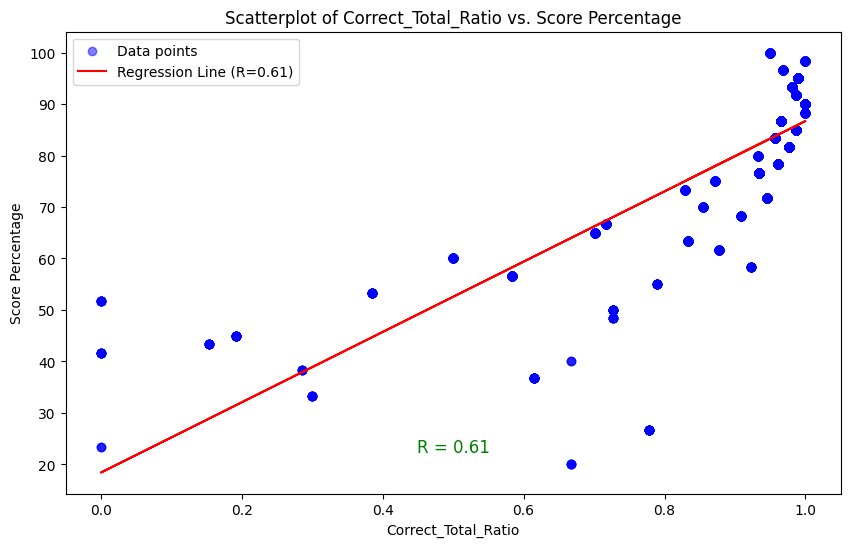

In [35]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the data
data_path = 'newdf_with_correct_total_ratio.csv' 
data = pd.read_csv(data_path)

# Converting 'Score' to percentages
data['Score_Percentage'] = (data['Score'] / 60) * 100

# Selecting the independent and dependent variables
X = data[['Correct_Total_Ratio']]  # Independent variable (X)
Y = data['Score_Percentage']  # Dependent variable (Y)

# Creating the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Making predictions
Y_pred = model.predict(X)

# Calculating the R-squared value
r_value = model.score(X, Y)

# Plotting the scatterplot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, Y_pred, color='red', label=f'Regression Line (R={r_value:.2f})')
plt.title('Scatterplot of Correct_Total_Ratio vs. Score Percentage')
plt.xlabel('Correct_Total_Ratio')
plt.ylabel('Score Percentage')
plt.legend()
plt.text(0.5, 0.1, f'R = {r_value:.2f}', fontsize=12, ha='center', va='center',
         transform=plt.gca().transAxes, color='green')
plt.show()

#As it was predicted, there is a correlatio between 3-d person verb conjugation correct ratio and score percentage, R=0.61